# Lecture 13

In [7]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rcParams
rcParams['animation.html'] = 'jshtml'
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4
import time
import os
import glob

## AOM 3.14 Oceanic Convection

### 3.14.1 Background

### Rayleigh-Benard convective cells

![](https://i2.wp.com/fyfluiddynamics.com/wp-content/uploads/2017/10/tumblr_ox1uzrBs1r1qckzoqo1_540.gif?fit=540%2C303&ssl=1)


[FYFD: Examples of Rayliegh-Benard Convection](https://fyfluiddynamics.com/tagged/rayleigh-benard-convection/)


### 2D Convection

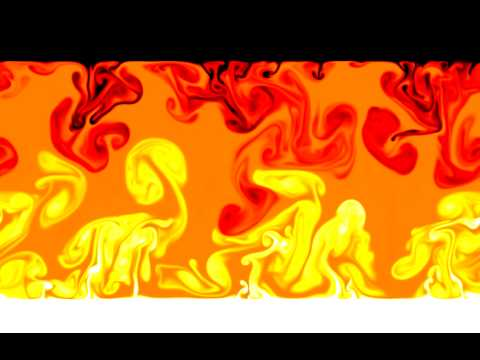

In [6]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('5ApSJe4FaLI', width=800, height=600)

### 3.14.2 Free Convection

> Unstable density stratification only leads to convection if dynamical disturbances can grow against effects of vertical diffusion of momentum and density.

Rayleigh number, $Ra$

$$ Ra = \frac{| N^2 | d^4}{k\nu} $$

- $N$, buoyancy frequency (negative for unstable density stratification)
- $d$, thicknes of unstable stratified fluid layer
- $k$, molecular diffusivity
- $\nu$, kinematic molecular viscosity

### 3.14.3 The Flux-Rayleigh Number

Convection can be driven by differences in temperature or salinity; the important thing is that there is an unstable density difference.

Consider the linear equation of state

$$\rho(T, S) = \rho_0 \left[ 1 - \alpha(T-T_0) + \beta(S - S_0)\right] $$

for a refence density $\rho_0$, reference temperature $T_0$, and reference salinity $S_0$.  Parameters

- $\alpha$, *thermal expansion* coefficient
- $\beta$, *saline contraction* coefficient

We can define a surface buoyancy flux $B$ by considering the density changes across a surface mixed layer of thickness $h$

$$\frac{ d \rho_{\mbox {mix}}}{dt} =  \frac{\rho_0}{gh} B$$

Think about "buoyancy" being something that may be added to or removed from a fluid.  Physically, a buoyancy flux at the surface is either due to

- a heat flux (for a positive heat flux at the surface, heat is being tranferred from the water to the air, the water cools, water temperature goes down, the density increases, buoyancy of the fluid decreases: there is positive buoyancy flux leaving the fluid) 

- or due to water volume flux (for a evaporation rate that exceeds the precipitation rate, net volume loss of fresh water, salinity increases, density increases, buoyancy of the fluid decreases: there is positive buoyancy flux leaving the fluid)

In terms of thermodynamic quantities, the surface buoyancy flux can be calculated from

$$ B = g \left[ \frac{\alpha}{\rho_0 C_p} Q  + \beta (E - P) S_mix \right] $$

Free convection occurs if the *flux-Rayleigh number* exceeds a critical value

$$Ra_f = \frac{B d^4}{k^2 \nu} $$

Particular values of $Ra_f$ for real situations are not known with certainty.

### 3.14.4 Aspect Ratio of Convection Cells

Convection cells typically have an *aspect ratio* of 2:1. That is, distance $L$ between adjacent convective plumes is about twice the penetration depth $H$.

To resolve each process we want at least 10 grid points of resolution and the model domain should be several times this length scale.

Example: if $ H = 100$ then `dx` and `dz` should be $< 10$ m and the domain width should be about 1 km. See Fig 3.30

### 3.14.5 Convective Mixed-Layer Deepening

Initial density stratification

$$ \rho(z) = \rho_0 \left( 1 + \frac{N^2}{g} |z| \right ) $$

Suppose the surface is cooled so that the density at the surface increases and convection begins. This convection forms a surface mixed layer of depth $h$ (see Fig 3.31)

The density of this mixed layer is the density at the bottom of the mixed layer:

$$ \rho_{\mbox{mix}} = \rho_0 \left(1 + \frac{N^2}{g} h\right)$$

Recall we define buoyancy flux according to 

$$\frac{ d \rho_{\mbox {mix}}}{dt} =  \frac{\rho_0}{gh} B$$

So, we need to take the temporal derivative of $\rho_{\mbox {mix}}$

$$\begin{align}
\frac{ d \rho_{\mbox {mix}}}{dt} &=  \rho_0\frac{N^2}{g} \frac{dh}{dt} \\
&= \frac{\rho_0}{gh} B
\end{align}$$

which means

$$ \rho_0\frac{N^2}{g} \frac{dh}{dt} = \frac{\rho_0}{gh} B$$

or

$$ \begin{align}
h \frac{dh}{dt} &= \frac{B}{N^2} \\
\frac{1}{2} \frac{dh^2}{dt} &= \frac{B}{N^2} \\
\end{align}$$

which has the solution

$$h(t) = \sqrt{\frac{2 B}{N^2} t}$$


This tells us that for a constance surface buoyancy flux, the thickness of the a convective mixed-layer should grow proportional to the square-root of time.  Also, the weaker the stratification ($N^2$), the faster the mixed-layer deepens.

## AOM 3.15 Exercise 8: Free convection

### 3.15.1 Aim

The aim of this exercise is to simulate the free convection process in the ocean with
the vertical ocean-slice model.

### 3.15.2 Task Description

Consider an ocean slice of 100 m in depth and 1,000 m in length (Fig. 3.32),
resolved by equidistant grid spacings of Δx = Δz = 5 m. Cyclic boundary conditions are used at the lateral boundaries. A linear version of the equation of state
is used (Eq. 3.65), whereby salinity effects are ignored. The thermal expansion
coefficient is set to a value of α = $2.5 \times 10^{-4}$ K$^{−1}$. Initially, the water column is at
rest and stably stratified in temperature with a stability frequency of N$ = 10^{−3}$ s$^{−1}$.
Random density fluctuations with maximum values of $10^{−4}$ kg/m$^3$ are added to the
density field using the random-number generator of previous exercises

A uniform heat loss of Q = 600 W/m$^2$ is prescribed at the sea surface. This heat loss cools
the uppermost grid cell at a rate of:

$$\frac{\partial T_s}{\partial t} = - \frac{Q}{\rho_0 C_p \Delta z}$$

- $C_P = 4000$ J kg$^{-3}$ K$^{-1}$ is the heat capacity of seawater
- Corresponding temperature decrease of 1.2$^\circ$ C per day for a water basin of 5-m depth, which is the vertical grid space used. 

In terms of density, this means

$$\frac{\partial \rho_s}{\partial t} = \frac{\alpha Q}{C_P \Delta z}$$

Noitice that positive heat flux Q means a density increase and hence a positive buoyancy flux $B$.

This model also includes momentum diffusion (with $A_h = A_z = 10^{-4}$ m$^2$/s) and bottom friction (bottom-drag coefficient of $r = 0.001$) as introduced in the OMB book.

The total simulation time is 6 hrs with data outputs at every
3 min. The time step is set to Δt = 1 s. The pressure accuracy of the S.O.R. iteration
is set to $\epsilon = 1 \times 10^{−3}$ Pa. This model application uses the rigid-lid approximation.

### 3.15.5 Results


(100.0, 0.0)

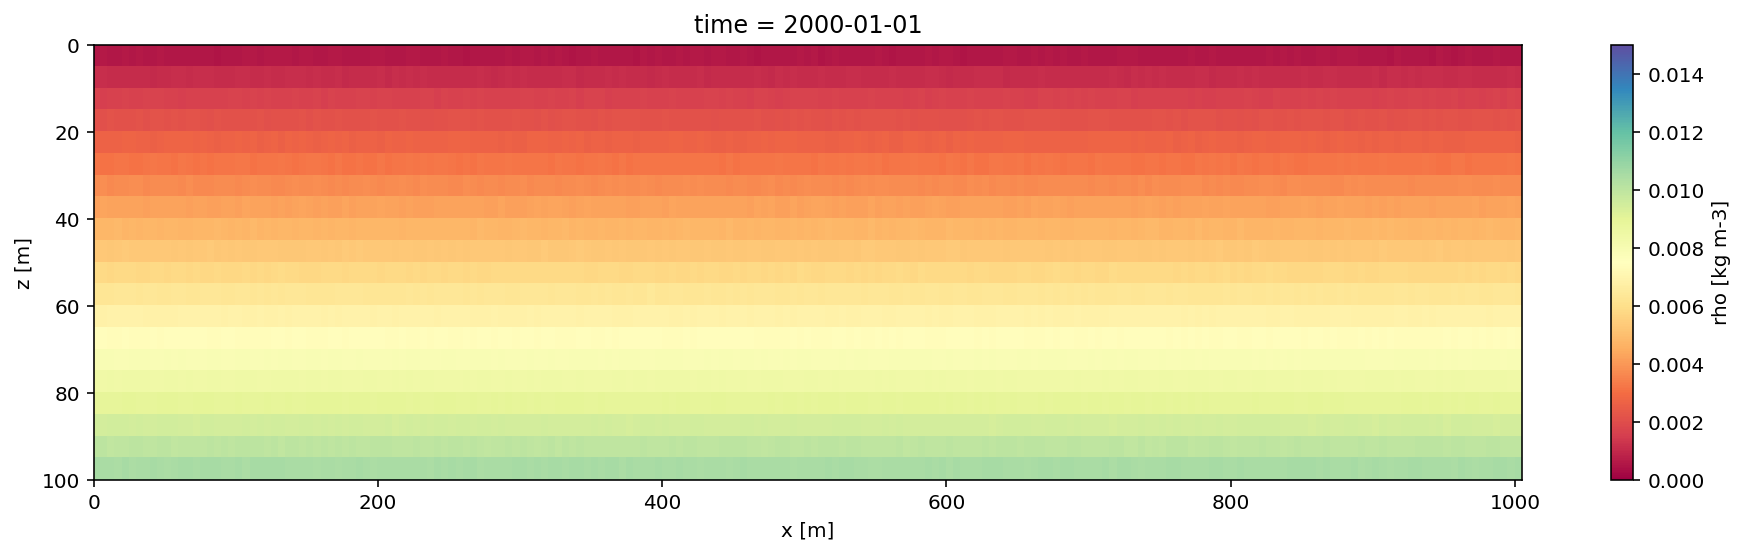

In [98]:
filename = 'src/AOM_Ex8/output.nc'
ds = xr.open_dataset(filename)
fig, ax = plt.subplots(figsize=(16, 4))
ds.rho[0].plot(ax=ax, x='x', cmap='Spectral', vmin = 0, vmax = 0.015)
plt.ylim(100, 0)

To handle round-off errors, notice that the density shown is$\rho - \rho_0$.

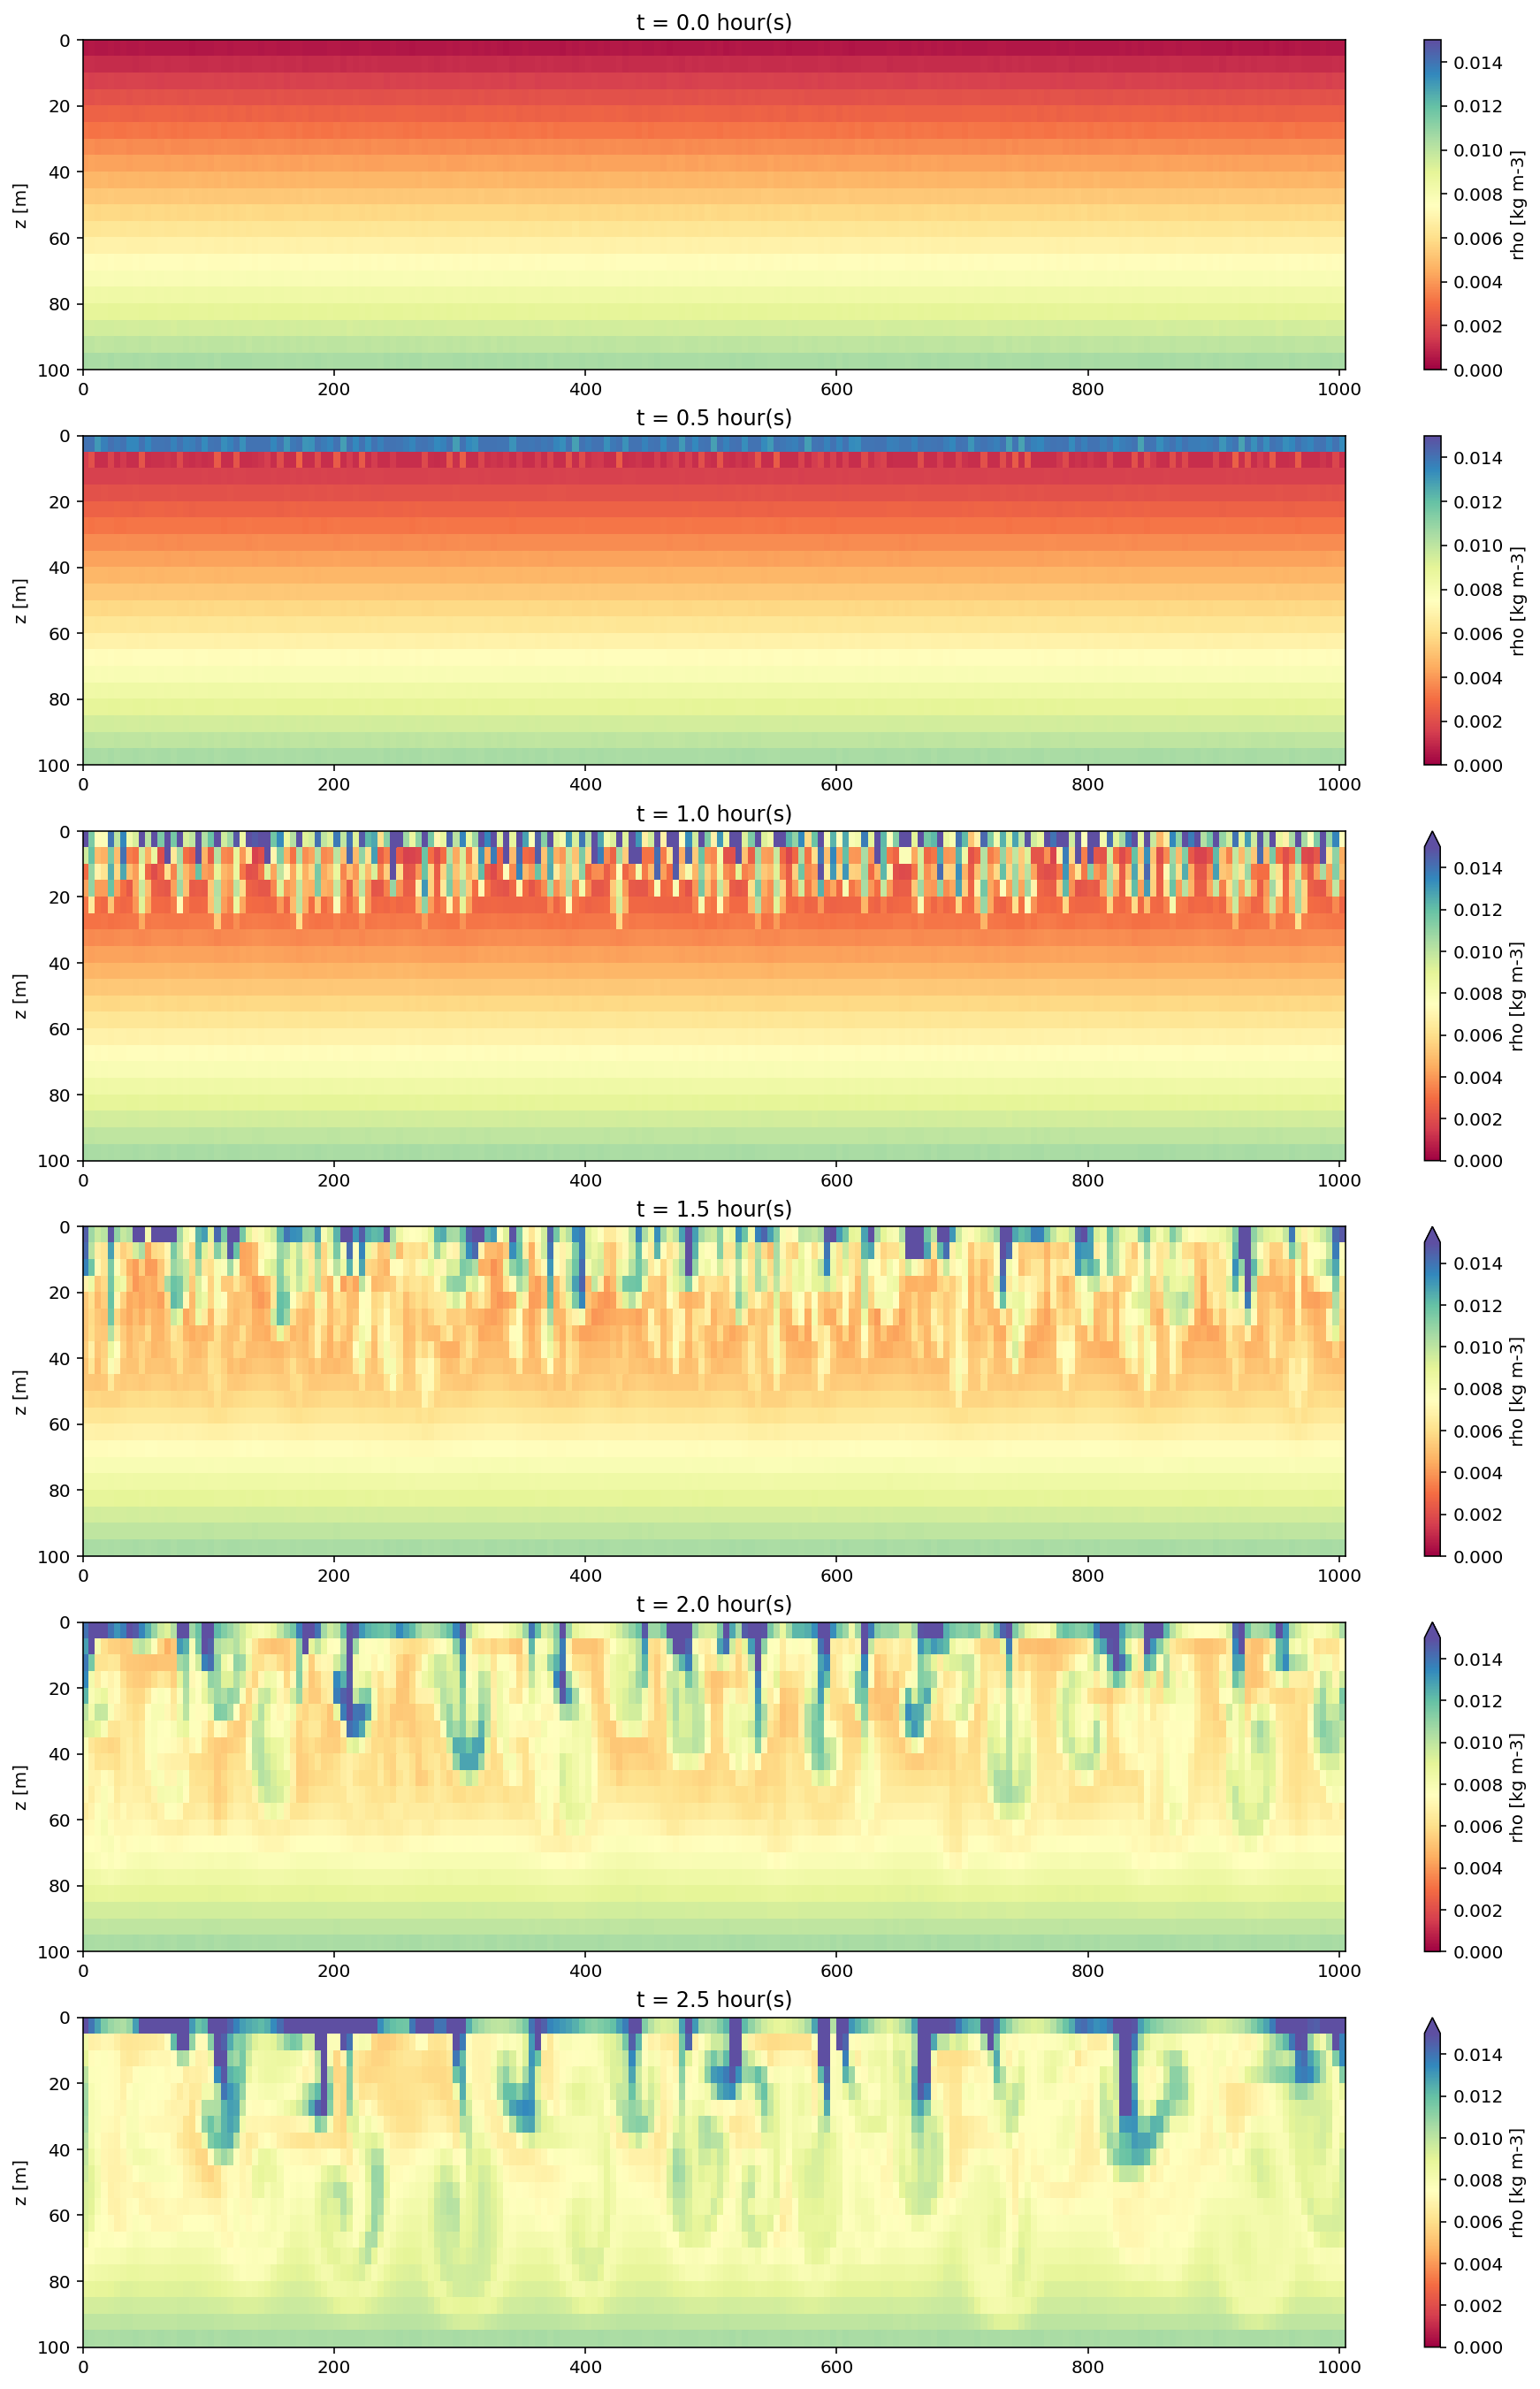

In [99]:
n = 6
fig, axes = plt.subplots(n, 1, figsize=(16, 24))
t = (ds.time - ds.time[0]).values / np.timedelta64(1, 'h')

for i in range(n):
    ds.rho[6*i].plot(x='x', ax=axes[i], cmap='Spectral',  vmin = 0, vmax = 0.015)
    axes[i].set_title(f't = {t[6*i]} hour(s)')
    axes[i].set_xlabel('')
    axes[i].set_ylim(100, 0)

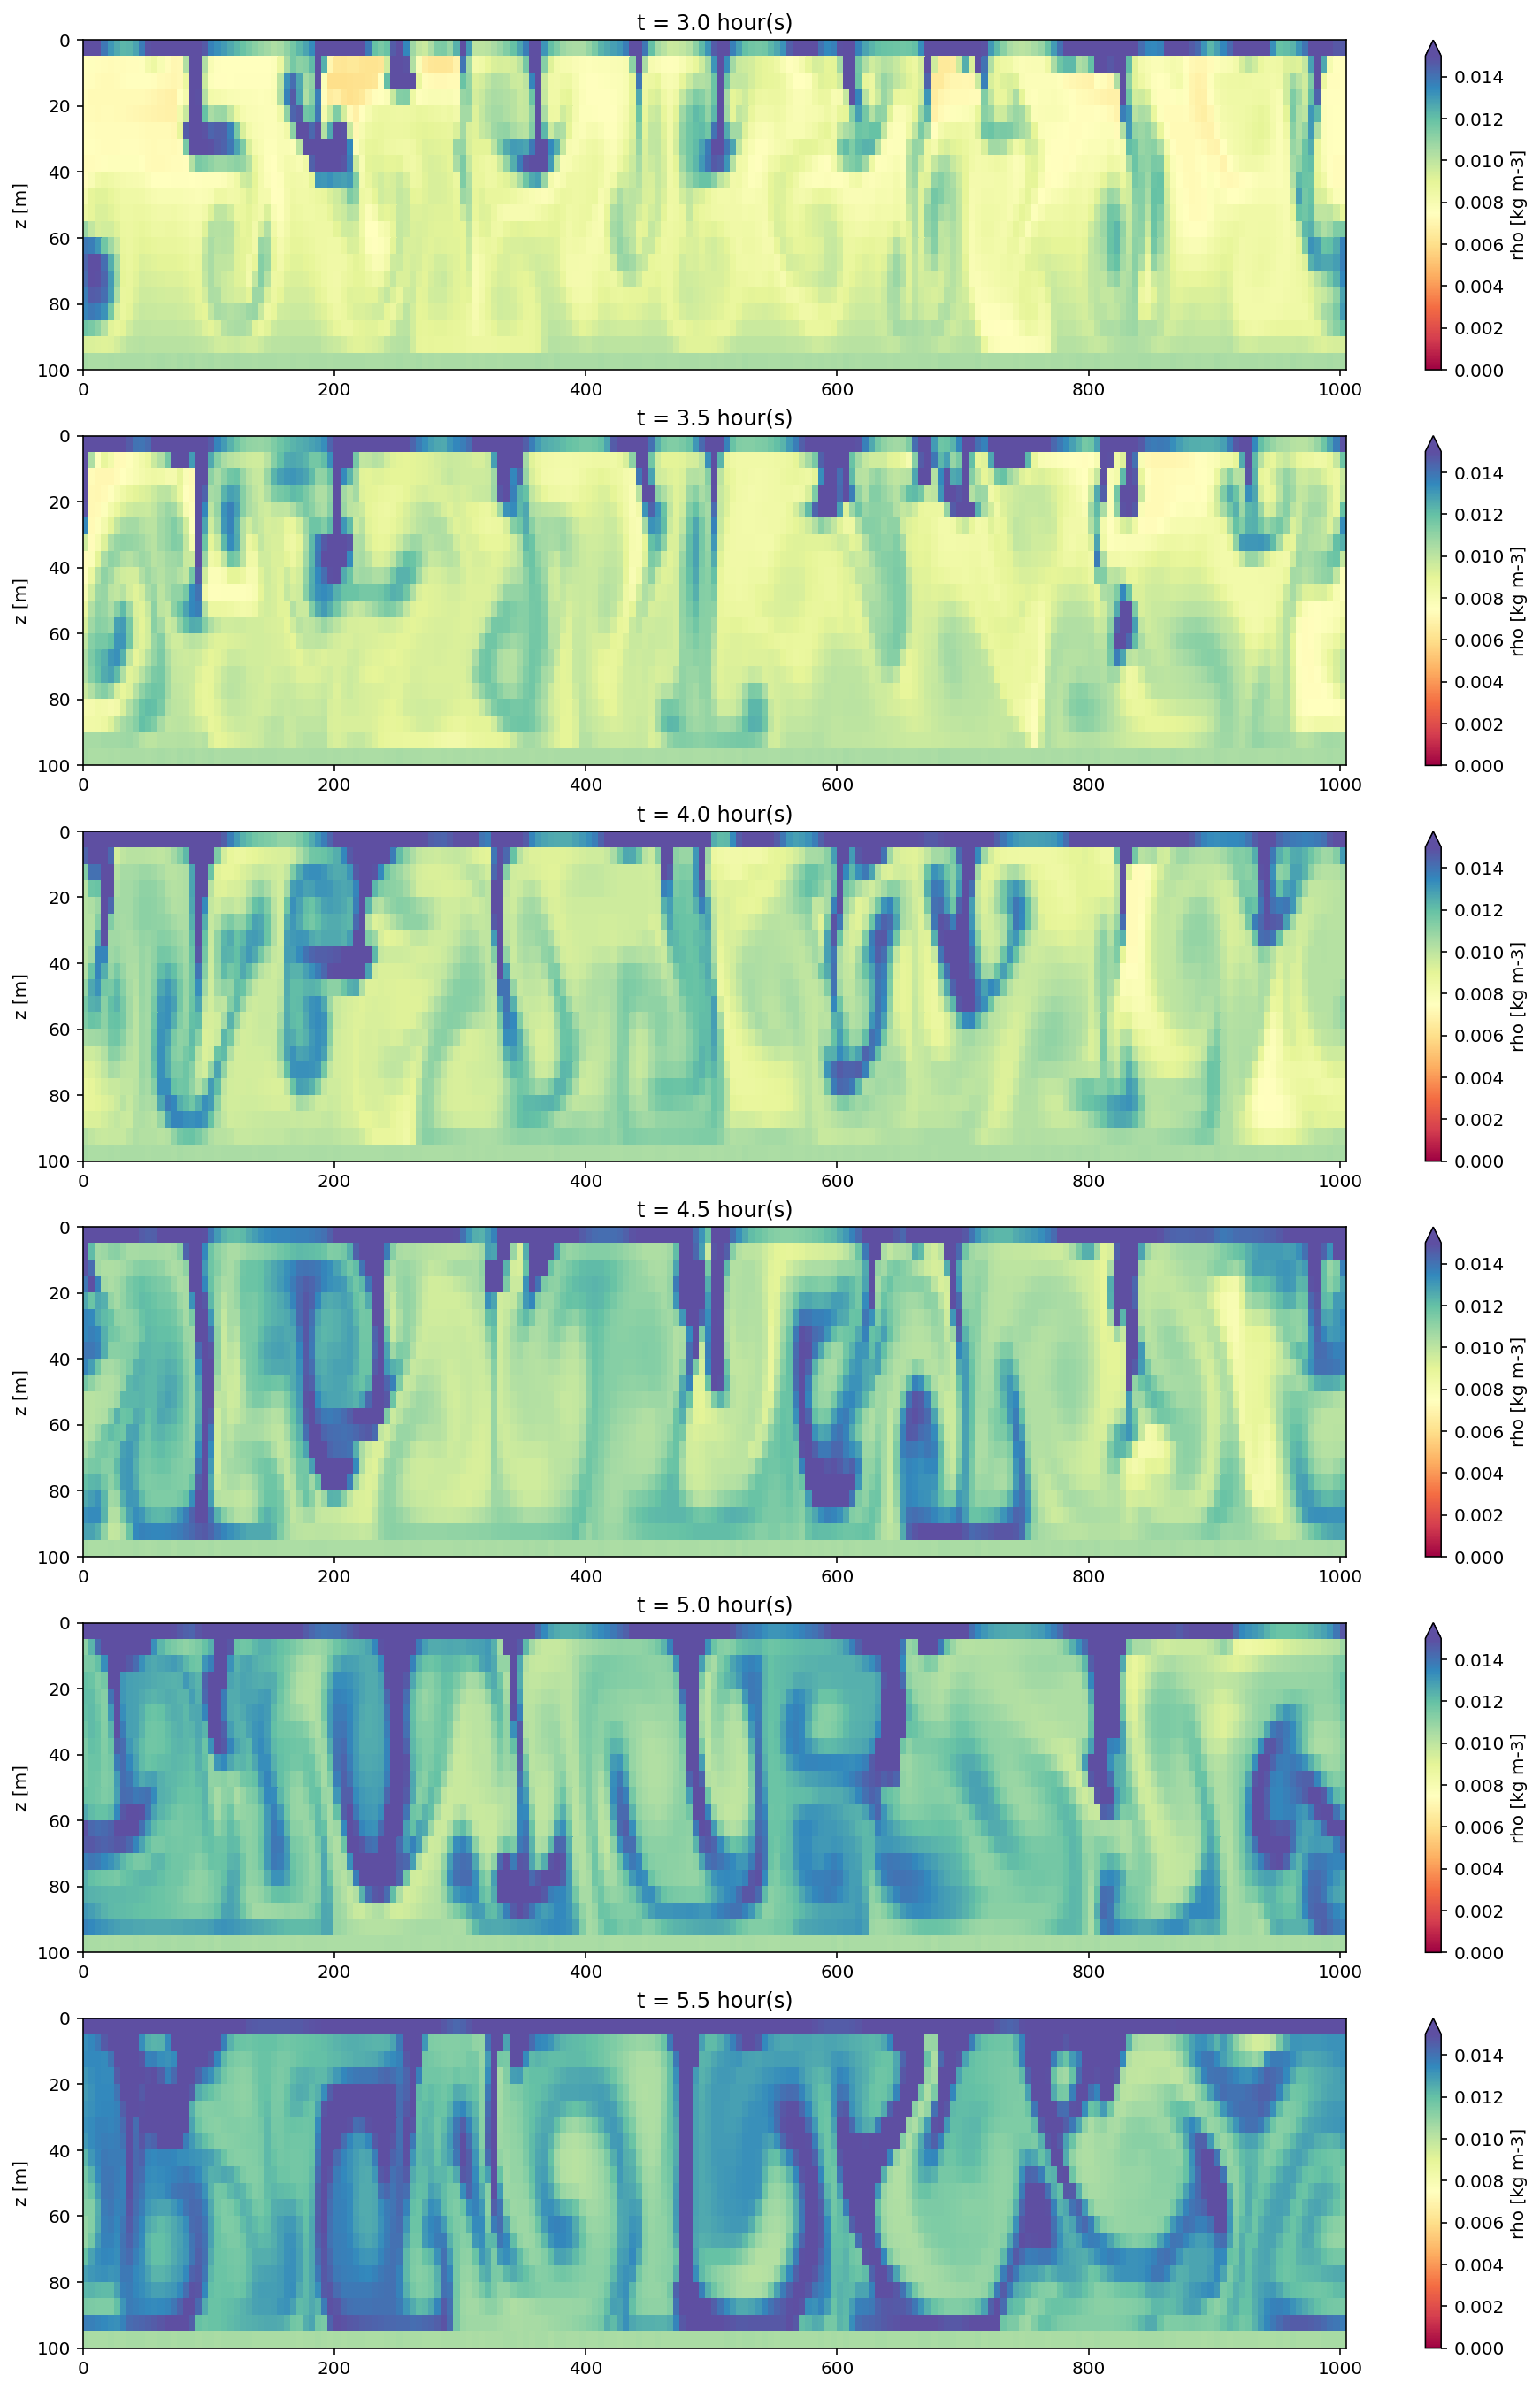

In [97]:
n = 6
fig, axes = plt.subplots(n, 1, figsize=(16, 24))
t = (ds.time - ds.time[0]).values / np.timedelta64(1, 'h')

for i in range(n):
    ds.rho[6*i + 36].plot(x='x', ax=axes[i], cmap='Spectral',  vmin = 0, vmax = 0.015)
    axes[i].set_title(f't = {t[6*i+36]} hour(s)')
    axes[i].set_xlabel('')
    axes[i].set_ylim(100, 0)

In [100]:
def animate_flow(filename):
    ds = xr.open_dataset(filename)
    fig, ax = plt.subplots(figsize=(12,5))

    # show time in units of hours
    t = (ds.time - ds.time[0]).values / np.timedelta64(1, 'h')
    
    x, z = np.meshgrid(ds.x, ds.z)
        
    pmesh = ax.pcolormesh(x, z, ds.rho[0].T, 
                      vmin=0, vmax=0.015,
                          cmap='Spectral',
                     shading='gouraud')
    
    fig.colorbar(pmesh, ax=ax)
    
    text = ax.set_title(f'time= {t[0]:.0f} hour(s)')

    def init():  
        
        ax.set_xlabel('x (m)')
        ax.set_ylabel('y (m)')
        ax.set_ylim(100, 0)
        
        return text, pmesh
    
    def update(frame):

        pmesh.set_array(ds.rho[frame].values.T.flatten())
        text.set_text(f'time= {t[frame]:.1f} hour(s)')
        
        return text, pmesh
    
        
    anim = FuncAnimation(fig, update, blit=True,
                         init_func=init,
                         #frames=np.arange(0, len(ds.time), 10),
                         frames=len(ds.time),
                        )
    plt.close(fig)
    
    return anim

In [101]:
filename = 'src/AOM_Ex8/output.nc'
anim = animate_flow(filename)

moviefile = 'Lecture13_mov1.mp4'
anim.save(moviefile, writer='ffmpeg', fps=5, dpi=200)

HTML(f'<center><video controls autoplay src="{moviefile}" width=100%/></center>')

Convective plumes reach the sea floor at 100-m depth after
about 3 hrs of applied surface heat loss. The final result of convection is an almost
well-mixed water column.

How does this compare with theory?

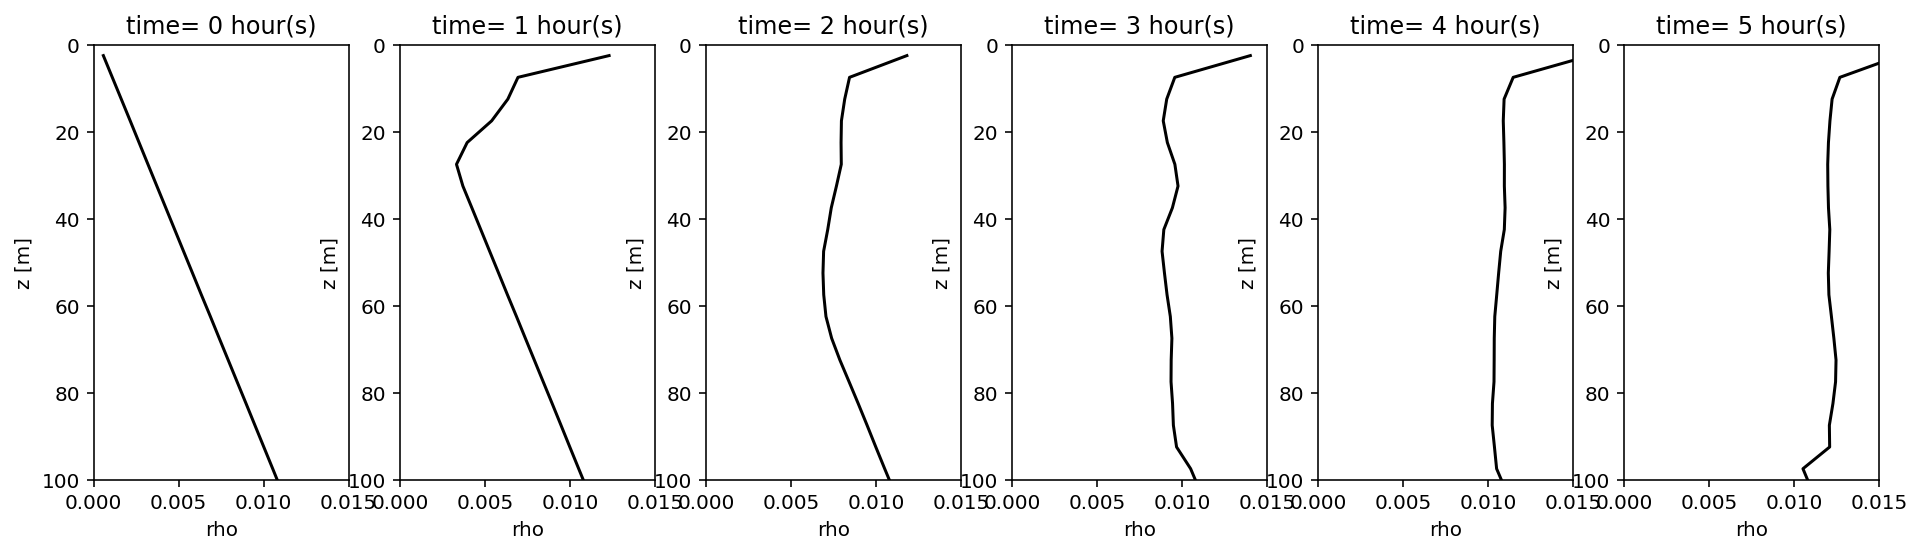

In [85]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))
t = (ds.time - ds.time[0]).values / np.timedelta64(1, 'h')
for i in range(6):
    ds.rho.mean(dim='x').isel(time=12*i).plot(ax=ax[i], y='z', color='k')
    ax[i].set_title(f'time= {t[12*i]:.0f} hour(s)')
    ax[i].set_ylim(100, 0)
    ax[i].set_xlim(0, 0.015)

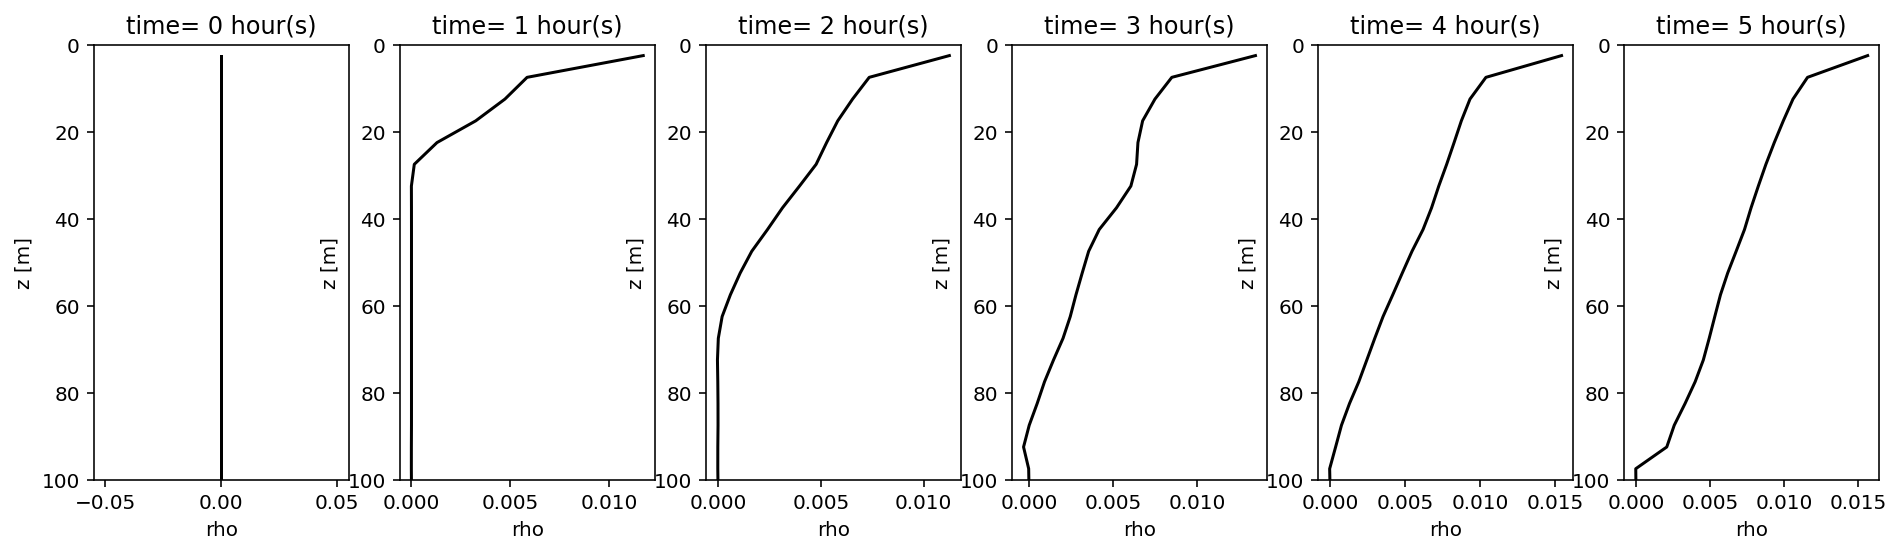

In [92]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))
t = (ds.time - ds.time[0]).values / np.timedelta64(1, 'h')
for i in range(6):
    (ds.rho.mean(dim='x').isel(time=12*i) - ds.rho.mean(dim='x').isel(time=0)).plot(ax=ax[i], y='z', color='k')
    ax[i].set_title(f'time= {t[12*i]:.0f} hour(s)')
    ax[i].set_ylim(100, 0)
   # ax[i].set_xlim(0, 0.015)

(100.0, 0.0)

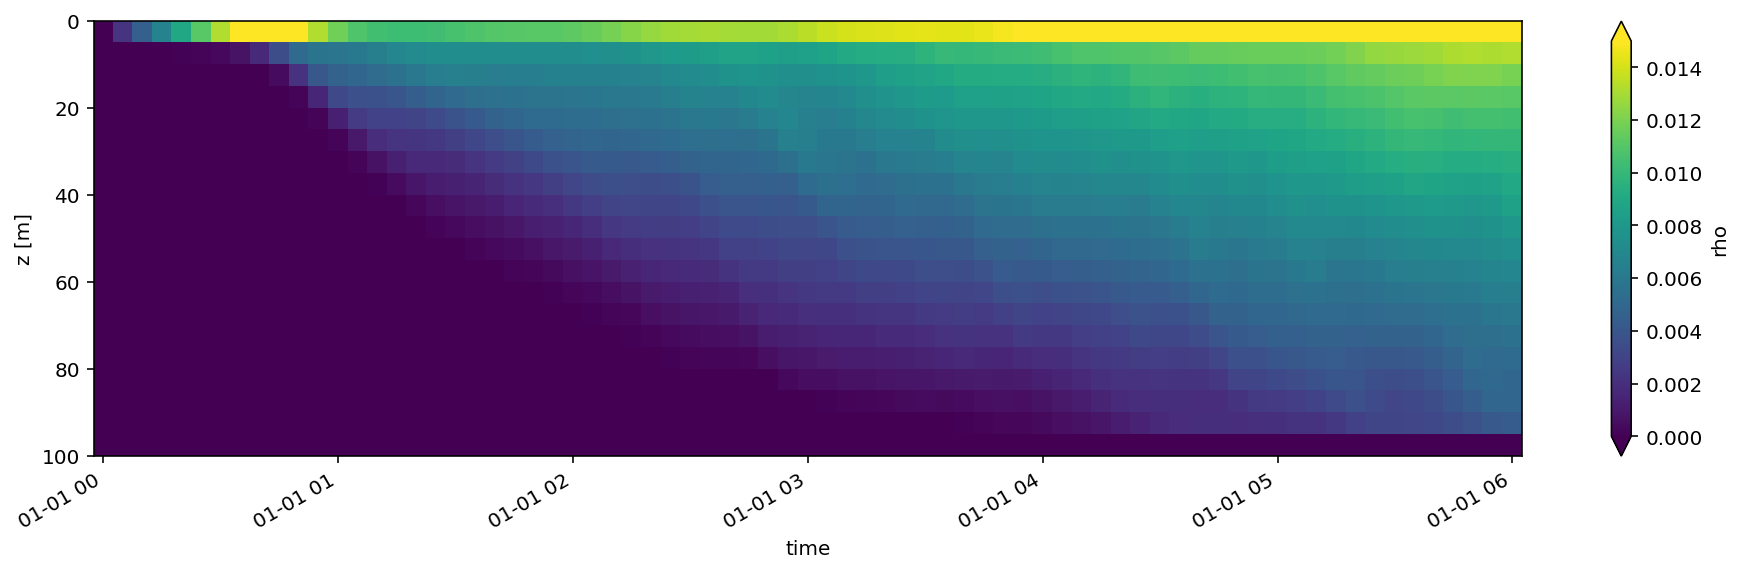

In [134]:
fig, ax = plt.subplots(figsize=(16, 4))
(ds.rho.mean(dim='x') - ds.rho.mean(dim='x').isel(time=0)).plot(ax=ax, y='z', cmap='viridis', vmin=0, vmax=0.015)
ax.set_ylim(100, 0)

Text(0.5, 0, 't ( hours)')

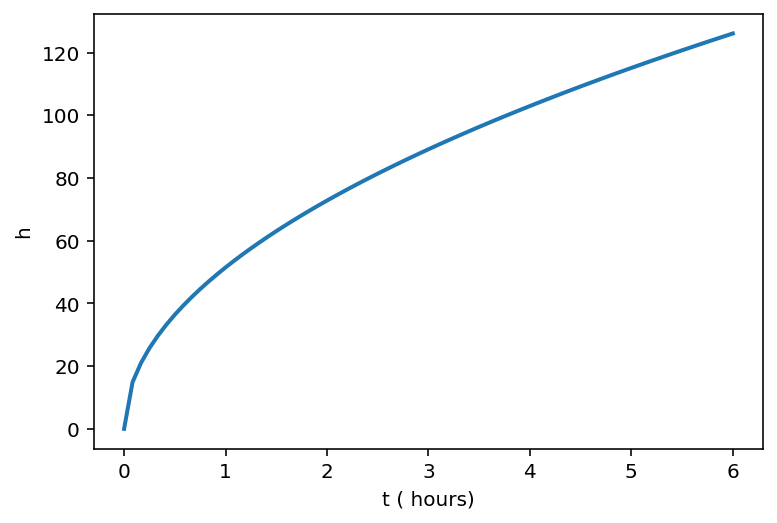

In [130]:
t = (ds.time - ds.time[0]).values / np.timedelta64(1, 's')
N = 1e-3
g = 9.81
Q = 600
α = 2.5e-4
Cp = 4000
ρ0 = 1000
B = g*α * Q / (ρ0 * Cp)
h = np.sqrt(2*B/N**2 *t)
plt.plot(t/3600, h, linewidth=2)
plt.ylabel('h')
plt.xlabel('t ( hours)')


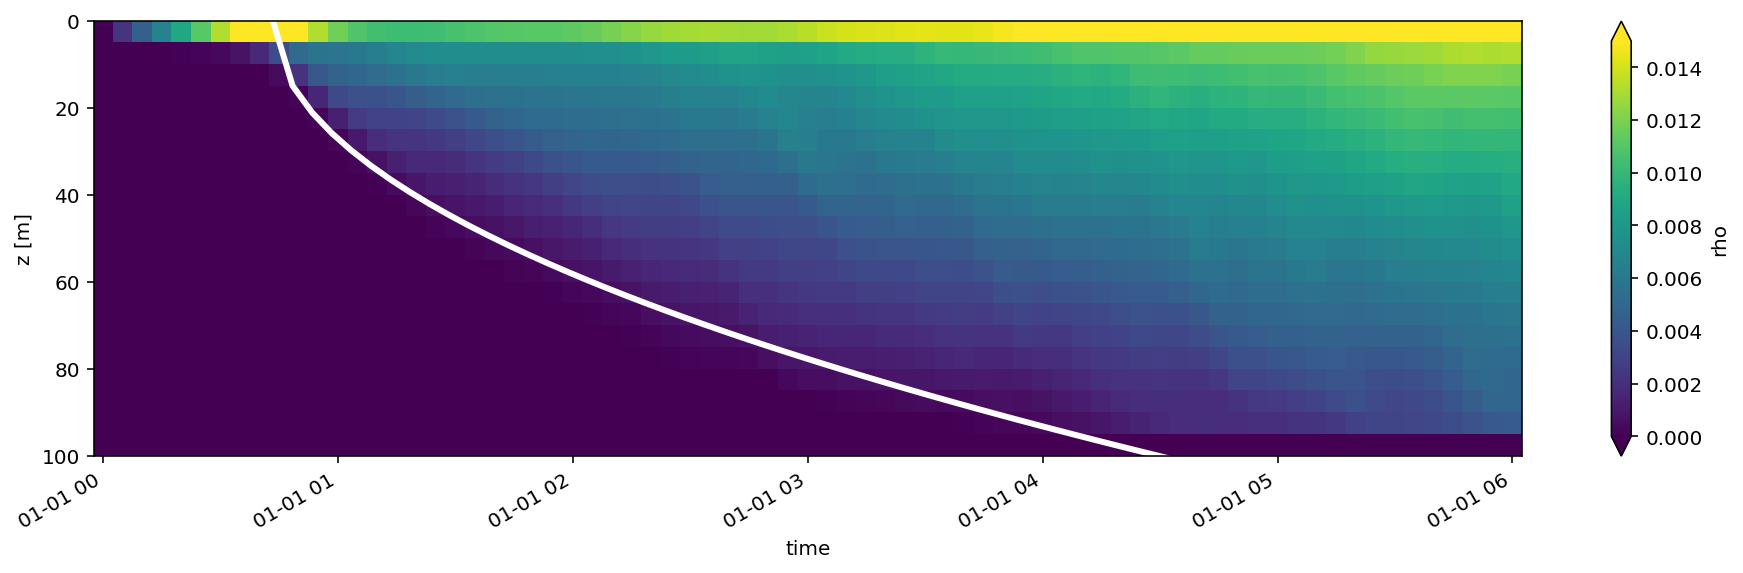

In [133]:
fig, ax = plt.subplots(figsize=(16, 4))
(ds.rho.mean(dim='x') - ds.rho.mean(dim='x').isel(time=0)).plot(ax=ax, y='z', cmap='viridis', vmin=0, vmax=0.015)
ax.set_ylim(100, 0)

plt.plot(ds.time + np.timedelta64(2600, 's'), h, color='w', linewidth=3)

## AOM 3.15 Exercise 9: Convective Entrainment

## AOM 3.17 Exercise 10: Slope Convection near the Shore

> Problem 21: Intrusive plume